In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import collections
import pydot

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
balance_data = pd.read_csv('Scoring.csv')

In [3]:
print("Dataset:: ")
balance_data.head()

Dataset:: 


,Acceleration,Speed(m/s),Angle,Target
0,201.0,22.0,39.3,Scored
1,156.0,34.0,42.0,Scored
2,195.0,33.0,62.0,Scored
3,186.0,28.0,32.0,Scored
4,73.0,24.0,10.5,Not-scored


In [9]:
X = balance_data.values[:, 0:3]
y = balance_data.values[:,3]

In [10]:
X

array([[201.0, 22.0, 39.3],
       [156.0, 34.0, 42.0],
       [195.0, 33.0, 62.0],
       [186.0, 28.0, 32.0],
       [73.0, 24.0, 10.5],
       [160.0, 41.0, 49.0],
       [83.5, 36.0, 11.8],
       [121.0, 21.0, 45.0],
       [118.0, 17.6, 41.8],
       [292.0, 17.35, 56.0],
       [305.0, 19.82, 58.0],
       [210.0, 18.26, 59.0],
       [132.0, 29.0, 65.0],
       [114.0, 20.0, 22.0],
       [250.0, 22.0, 11.6],
       [196.0, 19.0, 18.0],
       [407.0, 31.0, 9.0],
       [179.0, 48.6, 9.8],
       [87.0, 16.0, 17.0],
       [156.0, 23.0, 12.0],
       [61.0, 15.0, 9.0],
       [18.0, 6.52, 11.3],
       [116.0, 27.6, 13.2],
       [38.1, 21.5, 9.6]], dtype=object)

In [11]:
y

array(['Scored', 'Scored', 'Scored', 'Scored', 'Not-scored', 'Scored',
       'Not-scored', 'Scored', 'Scored', 'Scored', 'Scored', 'Scored',
       'Scored', 'Scored', 'Scored', 'Scored', 'Not-scored', 'Not-scored',
       'Not-scored', 'Not-scored', 'Not-scored', 'Not-scored',
       'Not-scored', 'Not-scored'], dtype=object)

In [14]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 0)

In [15]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [47]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en
X_test

array([[210.0, 18.26, 59.0],
       [305.0, 19.82, 58.0],
       [116.0, 27.6, 13.2],
       [250.0, 22.0, 11.6],
       [61.0, 15.0, 9.0],
       [156.0, 34.0, 42.0],
       [114.0, 20.0, 22.0],
       [38.1, 21.5, 9.6]], dtype=object)

In [59]:
clf_entropy.predict([[200,20,20]])

array(['Scored'], dtype=object)

In [60]:
print("Accuracy is ", accuracy_score(y_test,y_pred_en)*100)

Accuracy is  87.5


# Visualing

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus
import pandas as pd
import numpy as np

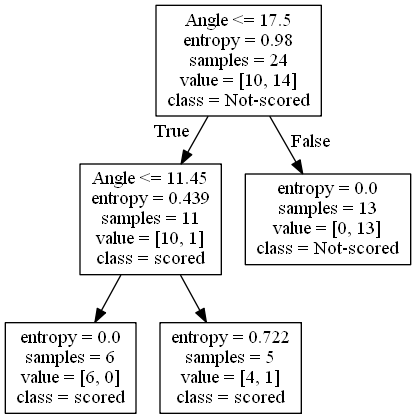

In [62]:
dot_data = tree.export_graphviz(clf_entropy, out_file=None, 
                                feature_names=['Acceleration','Speed(m/s)','Angle'],  
                                class_names=['scored', 'Not-scored'])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Limit max depth
clf_rand = RandomForestClassifier(max_depth = 3, n_estimators=10)

# Train
clf_rand.fit(X, y)
# Extract single tree
estimator_limited = clf_rand.estimators_[5]
estimator_limited

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=204474823, splitter='best')

In [33]:
y_pred_rand = clf_rand.predict(X_test)
y_pred_rand

array(['Scored', 'Scored', 'Not-scored', 'Scored', 'Not-scored', 'Scored',
       'Scored', 'Not-scored'], dtype=object)

In [34]:
print("Accuracy is ", accuracy_score(y_test,y_pred_rand)*100)

Accuracy is  100.0


In [39]:
model = RandomForestClassifier(max_depth = None, n_estimators=10)
model.fit(X, y)
estimator_nonlimited = model.estimators_[5]

In [40]:
y_pred_model = model.predict(X_test)
y_pred_model
print("Accuracy is ", accuracy_score(y_test,y_pred_model)*100)

Accuracy is  100.0


In [41]:
from sklearn.tree import export_graphviz
export_graphviz(estimator_limited, out_file='tree_limited.dot', feature_names = ['Acceleration','Speed(m/s)','Angle'],
                class_names = ['scored', 'Not-scored'],
                rounded = True, proportion = False, precision = 2, filled = True)

In [42]:
!dot -Tpng tree_limited.dot -o tree_limited.png -Gdpi=600

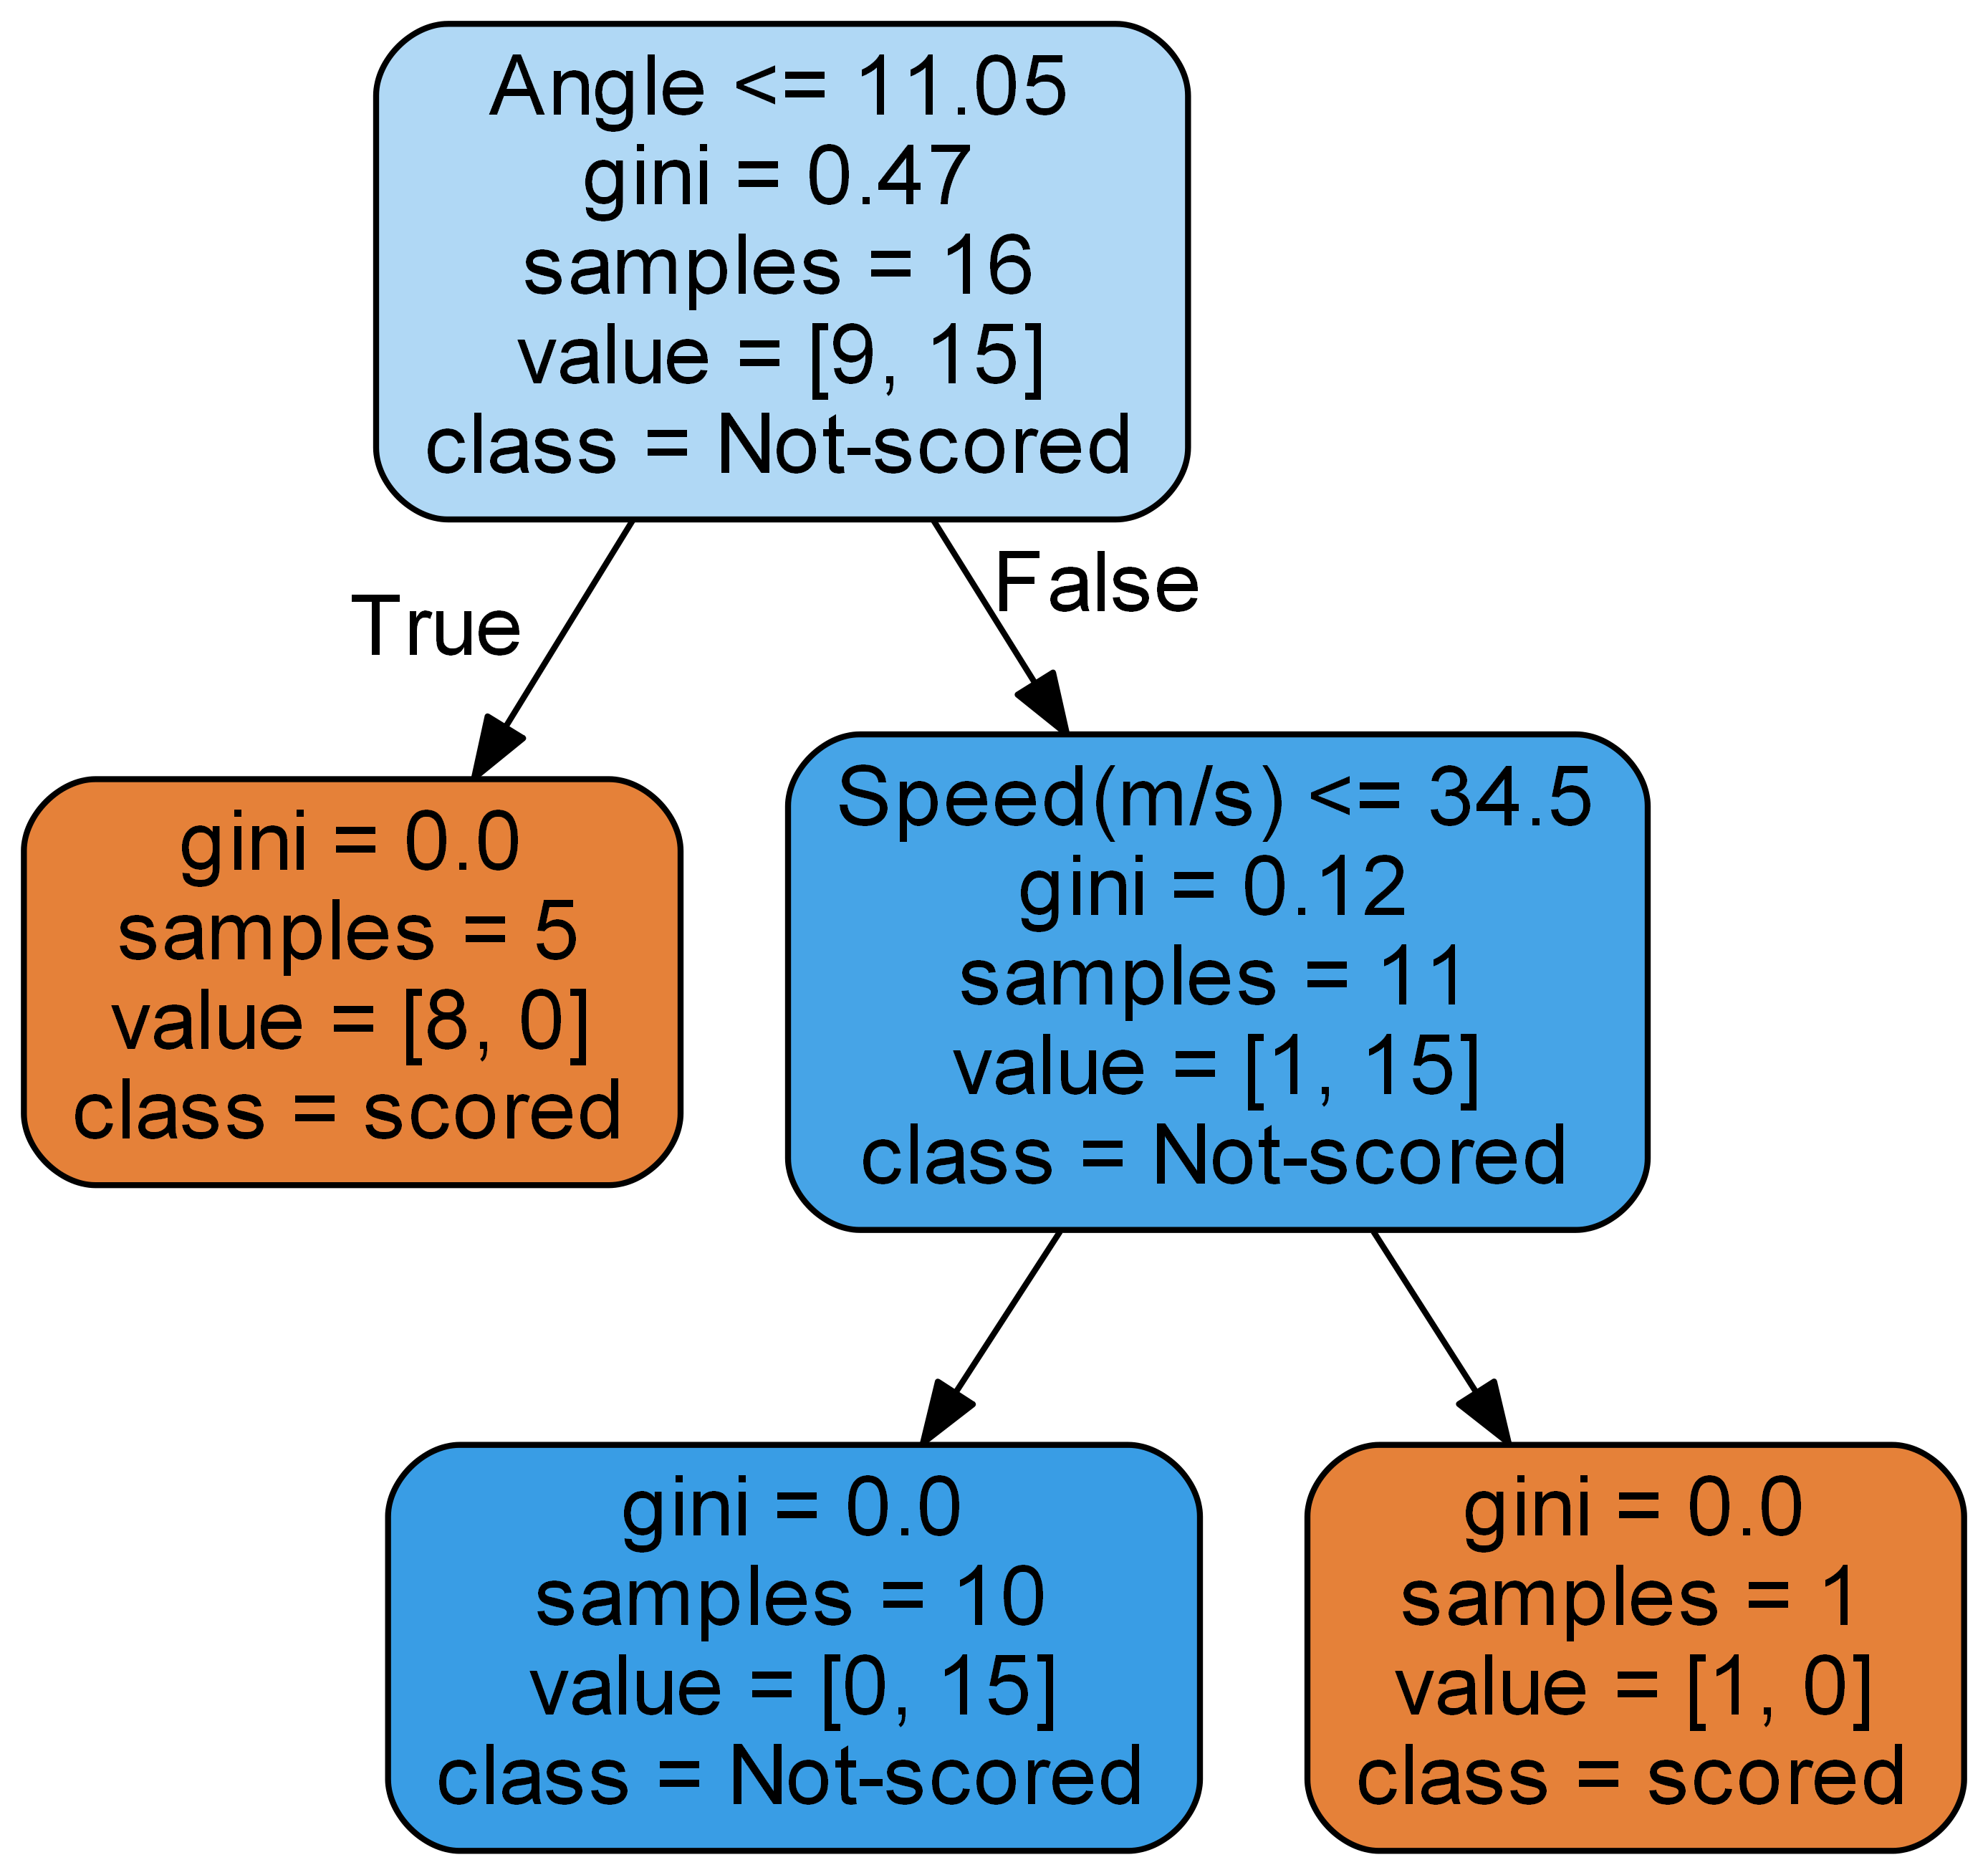

In [43]:
from IPython.display import Image
Image(filename = 'tree_limited.png')

In [58]:
clf_rand.predict([[200, 20, 20]])

array(['Scored'], dtype=object)